In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline

In [3]:
# Study data files
A_path = "group3_resources/SpotifyFeatures.csv"


# Read the data 
spotify_df = pd.read_csv(A_path)

#Visualizing data
spotify_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [96]:
#Dropping some columns that are not relevant for our objective
spotify_df1=spotify_df.drop(columns=['acousticness','duration_ms','instrumentalness',
                                     'key','liveness','mode','speechiness','time_signature'])
spotify_df1

,genre,artist_name,track_name,track_id,popularity,danceability,energy,loudness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.389,0.910,-1.828,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.590,0.737,-5.559,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.663,0.131,-13.879,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.240,0.326,-12.178,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.331,0.225,-21.150,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.687,0.714,-10.626,115.542,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.785,0.683,-6.944,113.830,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.517,0.419,-8.282,84.135,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.745,0.704,-7.137,100.031,0.489


In [4]:
len(spotify_df)

232725

In [5]:
count_track_name=spotify_df["track_name"].value_counts()
count_track_name

Home                                          100
You                                            71
Intro                                          69
Stay                                           63
Wake Up                                        59
                                             ... 
What More Do I Need? (From Saturday Night)      1
Electro Glide In Blue                           1
High Tide                                       1
He Is All We Need                               1
Big Bad                                         1
Name: track_name, Length: 148615, dtype: int64

In [94]:
#counting tracks
count_tracks=spotify_df["track_id"].value_counts()
count_tracks



0wY9rA9fJkuESyYm9uzVK5    8
3uSSjnDMmoyERaAK9KvpJR    8
3R73Y7X53MIQZWnKloWq5i    8
6AIte2Iej1QKlaofpjCzW1    8
6sVQNUvcVFTXvlk3ec0ngd    8
                         ..
0t78xGJe3jXsih4qRMId7I    1
6jUMc6knMI2ROH7JhrPbuL    1
5FA72nZ2ICYsjVYQuzHgoa    1
4rf0PQUHBvbpFWVxiXkauI    1
6zc3skkzxwCJXVywiv7JvM    1
Name: track_id, Length: 176774, dtype: int64

In [7]:
#counting artist
count_artist=spotify_df["artist_name"].value_counts()
count_artist

Giuseppe Verdi                        1394
Giacomo Puccini                       1137
Kimbo Children's Music                 971
Nobuo Uematsu                          825
Richard Wagner                         804
                                      ... 
Eric Steckel                             1
CES Cru                                  1
Totally Enormous Extinct Dinosaurs       1
Toivo Kuula                              1
Abigail Lapell                           1
Name: artist_name, Length: 14564, dtype: int64

In [8]:
len(spotify_df["artist_name"].unique())

14564

In [9]:
spotify_df["artist_name"].unique()


array(['Henri Salvador', 'Martin & les fées', 'Joseph Williams', ...,
       'Dharmasoul', 'Swim', 'Jr Thomas & The Volcanos'], dtype=object)

In [10]:
#Grouping by track id and take the average for each track popularity
genres_group=pd.DataFrame(spotify_df.groupby(['track_id'])['popularity'].mean())
genres_group=genres_group.reset_index()
genres_group

,track_id,popularity
0,00021Wy6AyMbLP2tqij86e,13.0
1,000CzNKC8PEt1yC3L8dqwV,5.0
2,000DfZJww8KiixTKuk9usJ,30.0
3,000EWWBkYaREzsBplYjUag,39.0
4,000xQL6tZNLJzIrtIgxqSl,70.0
...,...,...
176769,7zz7MbCb9G7KJc1NVl9bL0,38.0
176770,7zzFNNxVD0h0ctAT08H0pa,40.0
176771,7zzTeItz93lYI52hlcipm5,28.0
176772,7zzZmpw8L66ZPjH1M6qmOs,67.0


In [11]:
len(genres_group)

176774

In [12]:
#Visualizing one of the duplicate entry
data_tracks=spotify_df.set_index('track_id')
track=data_tracks.loc['6sVQNUvcVFTXvlk3ec0ngd']
track

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,,
6sVQNUvcVFTXvlk3ec0ngd,Alternative,Cocteau Twins,Cherry-coloured Funk,57,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Dance,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Electronic,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Folk,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Children’s Music,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Indie,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,Rock,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365
6sVQNUvcVFTXvlk3ec0ngd,World,Cocteau Twins,Cherry-coloured Funk,61,0.00174,0.377,192467,0.65,0.000057,D,0.107,-5.902,Major,0.029,180.074,4/4,0.365


In [13]:
#Dropping duplicates, keeping just one of the duplicates, removing 2 columns
drop_duplicates=spotify_df.drop_duplicates(subset=['track_id']).drop(columns=['popularity','instrumentalness','key','mode','time_signature','acousticness','duration_ms'])
drop_duplicates

,genre,artist_name,track_name,track_id,danceability,energy,liveness,loudness,speechiness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,0.3460,-1.828,0.0525,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.737,0.1510,-5.559,0.0868,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.131,0.1030,-13.879,0.0362,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.326,0.0985,-12.178,0.0395,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.225,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.736,0.701,0.2030,-4.345,0.1000,99.991,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.802,0.516,0.1050,-9.014,0.2130,175.666,0.482
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.423,0.337,0.2760,-13.092,0.0436,80.023,0.497
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.785,0.683,0.2370,-6.944,0.0337,113.830,0.969


In [14]:
#Dropping duplicates, keeping just one of the duplicates, removing 2 columns
drop_duplicates_tracks=spotify_df.drop_duplicates(subset=['track_id']).drop(columns=['popularity','genre'])
drop_duplicates_tracks

,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


In [15]:
#merging the popularity mean to the free duplicate data
clean_data1=pd.merge(drop_duplicates,genres_group,how='left',on='track_id')
clean_data1

,genre,artist_name,track_name,track_id,danceability,energy,liveness,loudness,speechiness,tempo,valence,popularity
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.389,0.910,0.3460,-1.828,0.0525,166.969,0.814,0.0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.590,0.737,0.1510,-5.559,0.0868,174.003,0.816,1.0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.663,0.131,0.1030,-13.879,0.0362,99.488,0.368,3.0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.240,0.326,0.0985,-12.178,0.0395,171.758,0.227,0.0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.331,0.225,0.2020,-21.150,0.0456,140.576,0.390,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
176769,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.736,0.701,0.2030,-4.345,0.1000,99.991,0.770,39.0
176770,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.802,0.516,0.1050,-9.014,0.2130,175.666,0.482,43.0
176771,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,0.423,0.337,0.2760,-13.092,0.0436,80.023,0.497,32.0
176772,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.785,0.683,0.2370,-6.944,0.0337,113.830,0.969,38.0


In [16]:
#Calculating correlation between 2 variables; looks like loudness and energy has the greatest r value (0.8245..)
clean_data1.corr()

,danceability,energy,liveness,loudness,speechiness,tempo,valence,popularity
danceability,1.000000,0.365232,-0.026899,0.460542,0.133137,0.046786,0.587601,0.221062
energy,0.365232,1.000000,0.210485,0.824522,0.162432,0.241539,0.449565,0.235572
liveness,-0.026899,0.210485,1.000000,0.057915,0.555547,-0.062021,0.005851,-0.161978
loudness,0.460542,0.824522,0.057915,1.000000,0.000802,0.246279,0.426938,0.323306
speechiness,0.133137,0.162432,0.555547,0.000802,1.000000,-0.101591,0.018769,-0.162674
tempo,0.046786,0.241539,-0.062021,0.246279,-0.101591,1.000000,0.159027,0.083083
valence,0.587601,0.449565,0.005851,0.426938,0.018769,0.159027,1.000000,0.048539
popularity,0.221062,0.235572,-0.161978,0.323306,-0.162674,0.083083,0.048539,1.000000


In [48]:
#Group by popularity on the actual data to sort out more
genres_popularity=pd.DataFrame(spotify_df.groupby(['genre'])['popularity'].count())
genres_popularity=genres_popularity.reset_index()
genres_popularity

,genre,popularity
0,A Capella,119
1,Alternative,9263
2,Anime,8936
3,Blues,9023
4,Children's Music,5403
5,Children’s Music,9353
6,Classical,9256
7,Comedy,9681
8,Country,8664
9,Dance,8701


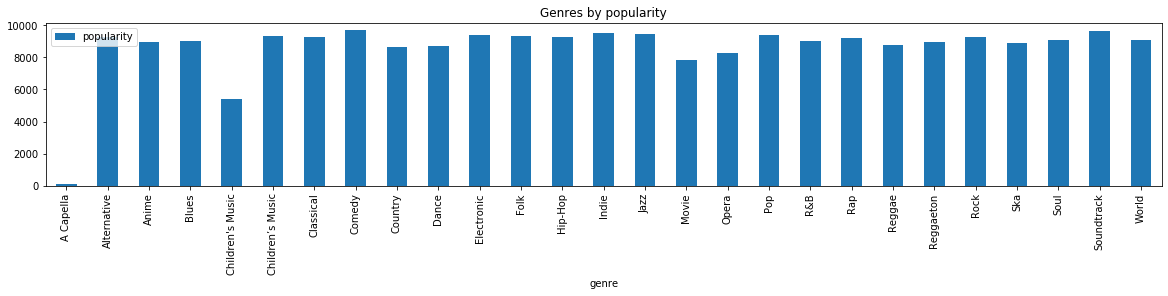

<Figure size 432x288 with 0 Axes>

In [18]:
# Use DataFrame.plot() in order to create a bar chart of the data
genres_popularity.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Genres by popularity")
plt.savefig("Images/Bar Chart 1.png")
plt.show()
plt.tight_layout()

In [19]:
#Get correlation table across all the music parameters using duplicates free data

clean_data1.corr()

,danceability,energy,liveness,loudness,speechiness,tempo,valence,popularity
danceability,1.000000,0.365232,-0.026899,0.460542,0.133137,0.046786,0.587601,0.221062
energy,0.365232,1.000000,0.210485,0.824522,0.162432,0.241539,0.449565,0.235572
liveness,-0.026899,0.210485,1.000000,0.057915,0.555547,-0.062021,0.005851,-0.161978
loudness,0.460542,0.824522,0.057915,1.000000,0.000802,0.246279,0.426938,0.323306
speechiness,0.133137,0.162432,0.555547,0.000802,1.000000,-0.101591,0.018769,-0.162674
tempo,0.046786,0.241539,-0.062021,0.246279,-0.101591,1.000000,0.159027,0.083083
valence,0.587601,0.449565,0.005851,0.426938,0.018769,0.159027,1.000000,0.048539
popularity,0.221062,0.235572,-0.161978,0.323306,-0.162674,0.083083,0.048539,1.000000


In [20]:
#Get statistical calculations for song paramters using clean data
stats_parameters=clean_data1.describe()
stats_parameters

,danceability,energy,liveness,loudness,speechiness,tempo,valence,popularity
count,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000
mean,0.541068,0.557025,0.224531,-10.137605,0.127395,117.203679,0.451595,36.417756
std,0.190387,0.275839,0.211027,6.395551,0.204345,31.325091,0.267820,17.505193
min,0.056900,0.000020,0.009670,-52.457000,0.022200,30.379000,0.000000,0.000000
25%,0.415000,0.344000,0.097500,-12.851000,0.036800,92.006000,0.222000,25.000000
50%,0.558000,0.592000,0.130000,-8.191000,0.049400,115.006500,0.440000,37.000000
75%,0.683000,0.789000,0.277000,-5.631000,0.102000,138.799750,0.667000,49.000000
max,0.989000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000,100.000000


## Analysis and Notes
Valence(happiness of song) and loudness effects the danceability
Energy and loudness are strongly correlated but energy of songs does not necessarily make songs danceable.

In [21]:
#Get correlation table for acapella genre; loudness and energy have the greatest/strong correlation with value 0.83
acapella_df=spotify_df.loc[spotify_df['genre']=="A Capella"]
acapella_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.024068,0.131122,-0.283878,0.004591,-0.052889,0.041579,0.143530,0.047540,-0.163670,0.176281
acousticness,-0.024068,1.000000,-0.587385,-0.007547,-0.773745,0.119052,0.027402,-0.702947,-0.389970,-0.162232,-0.626403
danceability,0.131122,-0.587385,1.000000,-0.276246,0.640513,-0.129068,0.077920,0.464488,0.609948,0.055634,0.801468
duration_ms,-0.283878,-0.007547,-0.276246,1.000000,-0.068611,-0.036807,-0.120106,0.079920,-0.338615,0.093094,-0.338503
energy,0.004591,-0.773745,0.640513,-0.068611,1.000000,-0.091685,-0.005375,0.831447,0.533846,0.154017,0.771961
instrumentalness,-0.052889,0.119052,-0.129068,-0.036807,-0.091685,1.000000,-0.048118,-0.078205,-0.083427,-0.083613,-0.135010
liveness,0.041579,0.027402,0.077920,-0.120106,-0.005375,-0.048118,1.000000,0.028509,-0.005268,0.005491,0.139954
loudness,0.143530,-0.702947,0.464488,0.079920,0.831447,-0.078205,0.028509,1.000000,0.227962,0.127713,0.603928
speechiness,0.047540,-0.389970,0.609948,-0.338615,0.533846,-0.083427,-0.005268,0.227962,1.000000,0.041552,0.623358
tempo,-0.163670,-0.162232,0.055634,0.093094,0.154017,-0.083613,0.005491,0.127713,0.041552,1.000000,0.098029


In [22]:
#Get correlation table for alternative genre; loudness and energy have the greatest/strong correlation with value 0.76
alternative_df=spotify_df.loc[spotify_df['genre']=="Alternative"]
alternative_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.011178,0.074798,0.010300,-0.015810,-0.038610,-0.046249,0.022043,-0.020401,-0.042115,0.069390
acousticness,0.011178,1.000000,0.157714,-0.074915,-0.670070,0.007244,-0.072548,-0.539731,0.097698,-0.154986,-0.104364
danceability,0.074798,0.157714,1.000000,-0.180400,-0.264651,-0.037815,-0.082150,-0.184828,0.136819,-0.252996,0.388324
duration_ms,0.010300,-0.074915,-0.180400,1.000000,-0.005971,0.092494,0.001181,-0.054251,-0.146404,0.023309,-0.213906
energy,-0.015810,-0.670070,-0.264651,-0.005971,1.000000,-0.031800,0.161743,0.759524,0.010815,0.196884,0.210264
instrumentalness,-0.038610,0.007244,-0.037815,0.092494,-0.031800,1.000000,0.000370,-0.155352,-0.096007,-0.012911,-0.023205
liveness,-0.046249,-0.072548,-0.082150,0.001181,0.161743,0.000370,1.000000,0.089983,0.091216,0.005958,0.026669
loudness,0.022043,-0.539731,-0.184828,-0.054251,0.759524,-0.155352,0.089983,1.000000,-0.062331,0.149525,0.127760
speechiness,-0.020401,0.097698,0.136819,-0.146404,0.010815,-0.096007,0.091216,-0.062331,1.000000,-0.009098,0.083958
tempo,-0.042115,-0.154986,-0.252996,0.023309,0.196884,-0.012911,0.005958,0.149525,-0.009098,1.000000,-0.004512


In [23]:
#Get correlation table for anime genre;loudness and energy have the greatest/strong correlation with value 0.86
anime_df=spotify_df.loc[spotify_df['genre']=="Anime"]
anime_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.145594,0.066151,0.186172,0.184596,-0.259088,0.026652,0.232474,0.054461,0.040070,0.102058
acousticness,-0.145594,1.000000,-0.221672,-0.124523,-0.852167,0.493250,-0.208408,-0.753039,-0.264616,-0.291328,-0.453155
danceability,0.066151,-0.221672,1.000000,0.083563,0.277987,-0.306224,-0.021439,0.278221,-0.043326,0.000127,0.547510
duration_ms,0.186172,-0.124523,0.083563,1.000000,0.187547,-0.360321,0.050105,0.281177,-0.007095,0.026034,0.016114
energy,0.184596,-0.852167,0.277987,0.187547,1.000000,-0.574837,0.253347,0.868685,0.386093,0.334161,0.549710
instrumentalness,-0.259088,0.493250,-0.306224,-0.360321,-0.574837,1.000000,-0.140861,-0.676249,-0.205650,-0.190933,-0.400009
liveness,0.026652,-0.208408,-0.021439,0.050105,0.253347,-0.140861,1.000000,0.211958,0.153747,0.085828,0.095281
loudness,0.232474,-0.753039,0.278221,0.281177,0.868685,-0.676249,0.211958,1.000000,0.260339,0.289933,0.489790
speechiness,0.054461,-0.264616,-0.043326,-0.007095,0.386093,-0.205650,0.153747,0.260339,1.000000,0.255456,0.057329
tempo,0.040070,-0.291328,0.000127,0.026034,0.334161,-0.190933,0.085828,0.289933,0.255456,1.000000,0.244281


In [24]:
#Get correlation table for blues genre;loudness and energy have the greatest/strong correlation with value 0.74
blues_df=spotify_df.loc[spotify_df['genre']=="Blues"]
blues_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.036690,-0.030861,-0.069534,0.024118,-0.075599,-0.106456,0.019739,-0.048995,-0.003296,-0.001557
acousticness,-0.036690,1.000000,0.187351,-0.177770,-0.668729,-0.024845,-0.064290,-0.488972,-0.002704,-0.121505,-0.062607
danceability,-0.030861,0.187351,1.000000,-0.214951,-0.223483,-0.133324,-0.222082,-0.143458,-0.025549,-0.266532,0.429272
duration_ms,-0.069534,-0.177770,-0.214951,1.000000,0.066951,0.174265,0.238457,0.018887,-0.095503,0.005753,-0.203133
energy,0.024118,-0.668729,-0.223483,0.066951,1.000000,0.039941,0.190295,0.744971,0.128462,0.167164,0.214156
instrumentalness,-0.075599,-0.024845,-0.133324,0.174265,0.039941,1.000000,0.054073,-0.088847,-0.051712,-0.002286,-0.087621
liveness,-0.106456,-0.064290,-0.222082,0.238457,0.190295,0.054073,1.000000,0.059451,0.130283,0.034667,-0.049772
loudness,0.019739,-0.488972,-0.143458,0.018887,0.744971,-0.088847,0.059451,1.000000,-0.019967,0.088631,0.051681
speechiness,-0.048995,-0.002704,-0.025549,-0.095503,0.128462,-0.051712,0.130283,-0.019967,1.000000,0.123272,0.025204
tempo,-0.003296,-0.121505,-0.266532,0.005753,0.167164,-0.002286,0.034667,0.088631,0.123272,1.000000,0.061543


In [84]:
#Calculating and listing average for music parameters for each genre
genre_df = spotify_df.groupby(['genre'])
mean_score = pd.DataFrame(round(genre_df.mean(),2))   
mean_score1 = mean_score.loc[:,['popularity','danceability','energy','tempo','loudness']]


mean_score1=mean_score1.reset_index()
mean_score1.rename(columns={'genre':'Genre',
                       'popularity':'Aver. Popularity',
                      'danceability': 'Aver. Danceability',
                      'energy':'Aver. Energy',
                       'tempo':'Aver. Tempo',
                       'loudness':'Aver. Loudness'
                     }, inplace=True)
mean_score1

,Genre,Aver. Popularity,Aver. Danceability,Aver. Energy,Aver. Tempo,Aver. Loudness
0,A Capella,9.30,0.41,0.25,111.52,-13.66
1,Alternative,50.21,0.54,0.71,122.53,-6.54
2,Anime,24.26,0.47,0.67,126.63,-7.92
3,Blues,34.74,0.53,0.61,121.14,-9.05
4,Children's Music,4.25,0.70,0.40,121.13,-11.64
5,Children’s Music,54.66,0.54,0.71,121.93,-6.53
6,Classical,29.28,0.31,0.18,104.34,-21.54
7,Comedy,21.34,0.56,0.68,98.24,-11.69
8,Country,46.10,0.58,0.64,123.41,-7.34
9,Dance,57.28,0.64,0.70,120.80,-6.05


In [85]:
#Sorting top 5 popular genres based on popularity
top_5 = mean_score1.sort_values("Aver. Popularity", ascending=False)
top_5=top_5.set_index('Genre')
top_5.head(5)

,Aver. Popularity,Aver. Danceability,Aver. Energy,Aver. Tempo,Aver. Loudness
Genre,,,,,
Pop,66.59,0.64,0.64,121.18,-6.50
Rap,60.53,0.70,0.65,121.10,-6.67
Rock,59.62,0.54,0.68,122.63,-7.29
Hip-Hop,58.42,0.72,0.64,120.79,-6.86
Dance,57.28,0.64,0.70,120.80,-6.05


In [87]:
#Sorting bottom 5 popular genres based on popularity
worst_5 = mean_score1.sort_values("Aver. Popularity", ascending=True)
worst_5=worst_5.set_index('Genre')
worst_5.head(5)

,Aver. Popularity,Aver. Danceability,Aver. Energy,Aver. Tempo,Aver. Loudness
Genre,,,,,
Children's Music,4.25,0.70,0.40,121.13,-11.64
A Capella,9.30,0.41,0.25,111.52,-13.66
Movie,12.17,0.49,0.37,113.95,-12.95
Opera,13.34,0.29,0.17,101.80,-19.34
Comedy,21.34,0.56,0.68,98.24,-11.69


In [90]:
popularity_bins=mean_score1.copy()
#Creating popularity bins

size_bins = [0, 40, 60, 80,90,100]

# Create labels for these bins
size_labels = ["Not Popular (< 40)", "A Little Popular (40-60)", "Likable But Not Popular (60-80)","Popular (80-90)","Most Popular (90-100)"]
popularity_bins["Popularity Size"]=pd.cut(mean_score1["Aver. Popularity"], size_bins, labels=size_labels)
popularity_bins

,Genre,Aver. Popularity,Aver. Danceability,Aver. Energy,Aver. Tempo,Aver. Loudness,Popularity Size
0,A Capella,9.30,0.41,0.25,111.52,-13.66,Not Popular (< 40)
1,Alternative,50.21,0.54,0.71,122.53,-6.54,A Little Popular (40-60)
2,Anime,24.26,0.47,0.67,126.63,-7.92,Not Popular (< 40)
3,Blues,34.74,0.53,0.61,121.14,-9.05,Not Popular (< 40)
4,Children's Music,4.25,0.70,0.40,121.13,-11.64,Not Popular (< 40)
5,Children’s Music,54.66,0.54,0.71,121.93,-6.53,A Little Popular (40-60)
6,Classical,29.28,0.31,0.18,104.34,-21.54,Not Popular (< 40)
7,Comedy,21.34,0.56,0.68,98.24,-11.69,Not Popular (< 40)
8,Country,46.10,0.58,0.64,123.41,-7.34,A Little Popular (40-60)
9,Dance,57.28,0.64,0.70,120.80,-6.05,A Little Popular (40-60)


In [93]:
#Visualizing data in bins
summary_by_popularity_size=popularity_bins.groupby(by="Popularity Size").mean()

summary_by_popularity_size

,Aver. Popularity,Aver. Danceability,Aver. Energy,Aver. Tempo,Aver. Loudness
Popularity Size,,,,,
Not Popular (< 40),25.582143,0.503571,0.500714,115.505714,-11.742143
A Little Popular (40-60),51.917273,0.591818,0.610000,119.418182,-7.825455
Likable But Not Popular (60-80),63.560000,0.670000,0.645000,121.140000,-6.585000
Popular (80-90),NaN,NaN,NaN,NaN,NaN
Most Popular (90-100),NaN,NaN,NaN,NaN,NaN


In [25]:
# Visualize a data with popularity above 90 points
top_songs=spotify_df.loc[spotify_df['popularity'] >90]
top_songs

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9028,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,97,0.2970,0.752,201661,0.488,0.000009,F#,0.0936,-7.050,Major,0.0705,136.041,4/4,0.533
9029,Dance,Ariana Grande,needy,1TEL6MlSSVLSdhOSddidlJ,92,0.7800,0.647,171573,0.309,0.000007,G,0.2020,-7.948,Minor,0.0366,87.045,4/4,0.195
9030,Dance,Ariana Grande,NASA,4uTvPEr01pjTbZgl7jcKBD,91,0.4510,0.747,182000,0.458,0.000000,F#,0.2520,-6.891,Major,0.3030,75.029,4/4,0.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138922,Reggaeton,Anuel Aa,Amanece,1LiN0Z98FkR1t0m8KmLcAH,92,0.4370,0.790,190005,0.631,0.000000,G#,0.1580,-5.549,Minor,0.0425,94.039,4/4,0.889
138931,Reggaeton,Daddy Yankee,Adictiva,6MJUCumnQsQEKbCy28tbCP,91,0.2910,0.788,207853,0.771,0.000056,E,0.1720,-3.206,Minor,0.0563,99.038,4/4,0.701
152266,R&B,Ellie Goulding,Close To Me (with Diplo) (feat. Swae Lee),5JEx7HbmvHQQswJCsoo9rA,92,0.0969,0.574,182623,0.758,0.000000,C#,0.3950,-5.029,Minor,0.0621,144.111,4/4,0.492
152287,R&B,Mabel,Don't Call Me Up,5WHTFyqSii0lmT9R21abT8,91,0.2960,0.674,178480,0.881,0.000003,A,0.0793,-2.853,Major,0.1470,98.994,4/4,0.234


In [26]:
# Get maximum value of a single column popular
top_popularity = top_songs.sort_values('popularity', ascending=False)
top_popularity.head(30)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913


In [74]:
#sorting by genre to see what genres the are most popular in the top popular group (above 90)
top_genres=pd.DataFrame(top_popularity.groupby(['genre'])[['popularity','energy','tempo','danceability','loudness']].max())
top_genres=top_genres.sort_values('popularity', ascending=False)
top_genres=top_genres.reset_index()
top_genres

,genre,popularity,energy,tempo,danceability,loudness
0,Dance,100,0.887,169.999,0.847,-4.206
1,Pop,100,0.904,202.006,0.900,-2.652
2,Rap,99,0.730,202.006,0.921,-3.714
3,Hip-Hop,98,0.860,202.006,0.921,-2.652
4,Reggaeton,98,0.860,99.966,0.817,-2.652
5,Indie,97,0.488,136.041,0.752,-7.050
6,Electronic,96,0.798,95.948,0.841,-4.206
7,Rock,95,0.904,82.014,0.579,-2.729
8,R&B,92,0.881,144.111,0.674,-2.853


In [29]:
# Visualize a data with popularity less than 20 points
least_songs=spotify_df.loc[spotify_df['popularity'] < 10]
least_songs

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230606,Soul,En Vogue,Part of Me,68mQJIlvYPQSYnT7gUevxR,0,0.7840,0.719,359040,0.277,0.000000,C#,0.1560,-14.184,Major,0.0431,125.862,4/4,0.349
231504,Soul,Betty Wright,All Your Kissin' Sho' Don't Make True Lovin',3uu0paJlCBa5TXsWfSjZEQ,0,0.8910,0.578,157840,0.659,0.012800,A,0.2290,-11.202,Major,0.0576,110.802,4/4,0.907
231601,Soul,Carla Thomas,Will You Love Me Tomorrow,2VGtb4ecniIFgNDwN4l5sk,0,0.1660,0.731,183000,0.388,0.007640,A,0.0700,-10.977,Minor,0.0302,109.404,4/4,0.839
231616,Soul,Randy Crawford,Diamante,1C3GhtjP2dOjb6sFWfnpPq,0,0.2620,0.638,281000,0.416,0.000010,F,0.3390,-12.187,Major,0.0266,110.979,4/4,0.520


In [30]:
# Get minimum value of a single column popular
least_popularity = least_songs.sort_values('popularity', ascending=True)
least_popularity

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
76109,Children's Music,Zany Zack,You Have An Imagination,0o6GmlgMGc5cfTtLbuCV8t,0,0.810,0.635,114307,0.5120,0.000000,D,0.2310,-9.517,Major,0.0297,105.077,4/4,0.7790
76108,Children's Music,Zany Zack,Bad Hair Day,3ieoTGGrjy9YsfUHQJ8Sum,0,0.180,0.701,143680,0.6900,0.000000,C,0.0499,-9.014,Major,0.0417,140.006,4/4,0.9770
76107,Children's Music,The Hit Crew Kids,Three Little Kittens,1sO0QhUS6G9aEpGalI4sn3,0,0.374,0.568,235787,0.6280,0.000078,A,0.1130,-7.540,Major,0.0564,190.110,4/4,0.4680
76106,Children's Music,The Hit Crew Kids,Daddy Gave Me a Little Cat,6UEaW8xp48wx8liqsTeZ6A,0,0.734,0.807,81460,0.4740,0.000000,E,0.1710,-11.453,Major,0.0384,109.992,4/4,0.9220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82574,Opera,Giuseppe Verdi,"Rigoletto, Act I, Scene 2: Addio, speranza ed ...",7ynKSDEP5EvsZ0pKiwGW25,9,0.984,0.441,50800,0.2500,0.000167,C#,0.0690,-13.334,Major,0.0855,131.375,4/4,0.6960
80454,Opera,Amilcare Ponchielli,"La Gioconda, Act 3: Danza delle ore (Dance of ...",2IBlkBB1FgJfQLf3CGAheY,9,0.932,0.346,599600,0.1790,0.408000,E,0.2590,-14.629,Major,0.0405,133.625,4/4,0.1200
82572,Opera,Giacomo Puccini,"Puccini : Madama Butterfly : Act 2 ""Una nave d...",7slvAcHqFekHt4pbvtQx8u,9,0.985,0.287,453680,0.1070,0.000105,A,0.0708,-17.401,Major,0.0488,85.787,4/4,0.0616
82581,Opera,Georges Bizet,"Carmen, WD. 31, Act II: La fleur que tu m'avai...",0UiGIhVMMU52aUZQsEFAbD,9,0.963,0.125,256600,0.0786,0.041300,C#,0.3330,-22.298,Major,0.0423,67.015,4/4,0.0416


In [72]:
#sorting by genre to see what genres the are least popular in the top popular group (below 20)
least_genres=pd.DataFrame(least_popularity.groupby(['genre'])[['popularity','energy','tempo','danceability','loudness']].mean())
least_genres=least_genres.sort_values('popularity', ascending=True)
least_genres=least_genres.reset_index()
least_genres

,genre,popularity,energy,tempo,danceability,loudness
0,Country,0.000000,0.629063,128.725453,0.526656,-7.391500
1,Electronic,0.054545,0.783709,131.360764,0.670055,-7.559891
2,Dance,0.108108,0.715297,120.070919,0.664523,-6.420757
3,Folk,0.222222,0.466600,117.652667,0.458667,-9.465444
4,R&B,0.250000,0.528875,104.545500,0.579875,-8.807125
5,Children’s Music,0.320000,0.737720,123.554880,0.578840,-5.976400
6,Soul,0.500000,0.520222,112.329250,0.644083,-10.904806
7,Indie,0.500000,0.375000,102.435500,0.273000,-8.601500
8,Blues,1.061728,0.468568,115.514716,0.497210,-12.428864
9,Children's Music,1.096222,0.387748,120.886379,0.695820,-11.950468


In [70]:
#Merging top and bottom 9 genres
top_and_bottom=pd.concat([top_genres,least_genres],axis=0)
top_and_bottom

,genre,popularity,energy,tempo,danceability,loudness
0,Dance,100,0.887000,169.999,0.8470,-4.206
1,Pop,100,0.904000,202.006,0.9000,-2.652
2,Rap,99,0.730000,202.006,0.9210,-3.714
3,Hip-Hop,98,0.860000,202.006,0.9210,-2.652
4,Reggaeton,98,0.860000,99.966,0.8170,-2.652
5,Indie,97,0.488000,136.041,0.7520,-7.050
6,Electronic,96,0.798000,95.948,0.8410,-4.206
7,Rock,95,0.904000,82.014,0.5790,-2.729
8,R&B,92,0.881000,144.111,0.6740,-2.853
0,A Capella,0,0.025200,37.861,0.1500,-22.879


The correlation between popularity and danceability is 0.22


Text(20, 1.5, 'y = 0.0x + 0.45')

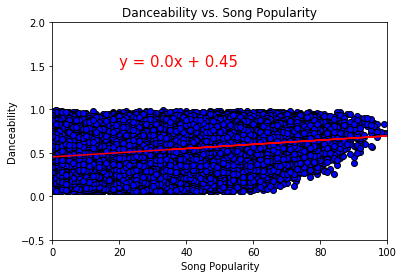

In [42]:
# Generate a scatter plot of popularity versus danceability
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter=clean_data1["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter=clean_data1["danceability"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Danceability")
plt.title("Danceability vs. Song Popularity")
plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter,y_axis_scatter)
print(f"The correlation between popularity and danceability is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
regress_values = x_axis_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter,regress_values,"r-")
plt.annotate(line_eq,(20,1.5),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot.png")

The correlation between popularity and tempo is 0.24


Text(20, 1.5, 'y = 0.0x + 0.42')

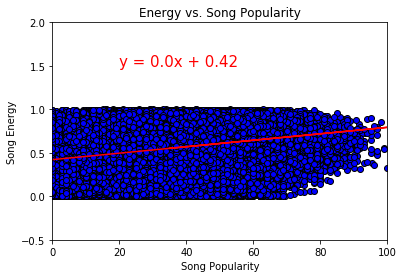

In [48]:
# Generate a scatter plot of popularity versus energy
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter1=clean_data1["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter1=clean_data1["energy"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,2)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Energy")
plt.title("Energy vs. Song Popularity")
plt.scatter(x_axis_scatter1, y_axis_scatter1, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter1,y_axis_scatter1)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter1, y_axis_scatter1)
regress_values = x_axis_scatter1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter1,regress_values,"r-")
plt.annotate(line_eq,(20,1.5),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot 1.png")

The correlation between popularity and tempo is 0.08


Text(20, 150, 'y = 0.15x + 111.79')

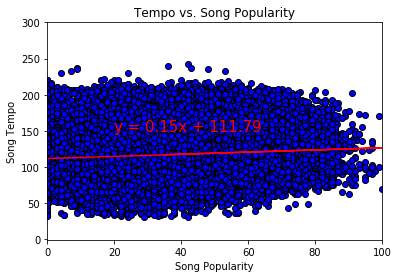

In [50]:
# Generate a scatter plot of popularity versus tempo
# Calculate the correlation coefficient and linear regression model 

#Create x-axis using popularity
x_axis_scatter3=clean_data1["popularity"]
#Create y-axis using songs' danceability
y_axis_scatter3=clean_data1["tempo"]
# Set the upper and lower limits of our y axis
plt.ylim(-0.5,300)
# Set the upper and lower limits of our x axis
plt.xlim(0,100)
# Create a title, x label, and y label for our chart
#plt.title("Correlation Between Weight & Tumor Volume")
plt.xlabel("Song Popularity")
plt.ylabel("Song Tempo")
plt.title("Tempo vs. Song Popularity")
plt.scatter(x_axis_scatter3, y_axis_scatter3, marker="o", facecolors="blue", edgecolors="black");
correlation = st.pearsonr(x_axis_scatter3,y_axis_scatter3)
print(f"The correlation between popularity and tempo is {round(correlation[0],2)}")
#Creating a regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter3, y_axis_scatter3)
regress_values = x_axis_scatter3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_scatter3,regress_values,"r-")
plt.annotate(line_eq,(20,150),fontsize=15,color="red")
#plt.savefig("Images/Scatterplot 3.png")